In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ahu03 = pd.read_csv('AHU_03.csv')
ahu03 = ahu03.ffill()

In [3]:
ahu03.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15
0,31-12-2015,00:00:00,ON,1.9,77.8,2.0,74.5,ON,75.1,20.0,75.1,77.73,15.0,77.9,15.0
1,31-12-2015,00:04:40,ON,1.9,77.8,2.0,74.5,ON,75.1,20.0,75.1,77.73,15.0,77.9,15.0
2,31-12-2015,00:04:52,ON,1.9,77.8,2.0,74.5,ON,75.1,20.0,75.1,77.73,15.0,77.9,15.0
3,31-12-2015,00:05:12,ON,1.9,77.8,2.0,74.5,ON,75.1,20.0,75.1,77.73,15.0,77.9,15.0
4,31-12-2015,00:05:27,ON,1.9,77.8,2.0,74.5,ON,75.1,20.0,75.1,77.73,15.0,77.9,15.0


In [4]:
ahu03.rename(columns={'Column1':'Date','Column2':'Time','Column3':'supply fan status','Column4':'Cooling coil valve %'},inplace=1)
ahu03.rename(columns={'Column5':'Discharger temp','Column6':'Mixed air damper %','Column7':'Mixed air temp'},inplace=1)
ahu03.rename(columns={'Column8':'Minimum outside air damper %','Column9':'Pre-heat coil discharger temp','Column10':'Pre-heat valve %'},inplace=1)
ahu03.rename(columns={'Column11':'Return air temp','Column12':'re-heat coil 1 Discharger temp','Column13':'re-heat coil 1 Discharger valve'},inplace=1)
ahu03.rename(columns={'Column14':'re-heat coil 2 Discharger temp','Column15':'re-heat coil 2 Discharger valve'},inplace=1)

In [5]:
ahu03.head()

,Date,Time,supply fan status,Cooling coil valve %,Discharger temp,Mixed air damper %,Mixed air temp,Minimum outside air damper %,Pre-heat coil discharger temp,Pre-heat valve %,Return air temp,re-heat coil 1 Discharger temp,re-heat coil 1 Discharger valve,re-heat coil 2 Discharger temp,re-heat coil 2 Discharger valve
0,31-12-2015,00:00:00,ON,1.9,77.8,2.0,74.5,ON,75.1,20.0,75.1,77.73,15.0,77.9,15.0
1,31-12-2015,00:04:40,ON,1.9,77.8,2.0,74.5,ON,75.1,20.0,75.1,77.73,15.0,77.9,15.0
2,31-12-2015,00:04:52,ON,1.9,77.8,2.0,74.5,ON,75.1,20.0,75.1,77.73,15.0,77.9,15.0
3,31-12-2015,00:05:12,ON,1.9,77.8,2.0,74.5,ON,75.1,20.0,75.1,77.73,15.0,77.9,15.0
4,31-12-2015,00:05:27,ON,1.9,77.8,2.0,74.5,ON,75.1,20.0,75.1,77.73,15.0,77.9,15.0


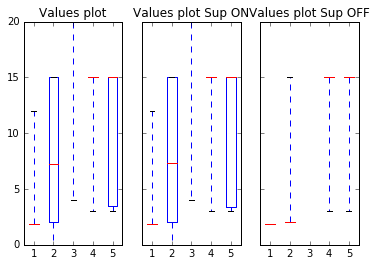

In [9]:
data=[ahu03['Cooling coil valve %'],ahu03['Mixed air damper %'],ahu03['Pre-heat valve %'],
      ahu03['re-heat coil 1 Discharger valve'],ahu03['re-heat coil 2 Discharger valve']]
sup_on = ahu03[ahu03['supply fan status'].str.contains('ON')]
sup_off = ahu03[ahu03['supply fan status'].str.contains('OFF')]
data_percent_1 = [sup_on['Cooling coil valve %'],sup_on['Mixed air damper %'],sup_on['Pre-heat valve %'],
                  sup_on['re-heat coil 1 Discharger valve'],sup_on['re-heat coil 2 Discharger valve']]
data_percent_2 = [sup_off['Cooling coil valve %'],sup_off['Mixed air damper %'],sup_off['Pre-heat valve %'],
                  sup_off['re-heat coil 1 Discharger valve'],sup_off['re-heat coil 2 Discharger valve']]

#fig, ax = plt.subplots( nrows=1, ncols=1 )
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True)
ax1.boxplot(data)
ax2.boxplot(data_percent_1)
ax3.boxplot(data_percent_2)
ax1.set_title("Values plot")
ax2.set_title('Values plot Sup ON')
ax3.set_title('Values plot Sup OFF')
plt.savefig(''.join(['values%','_ahu_03']))


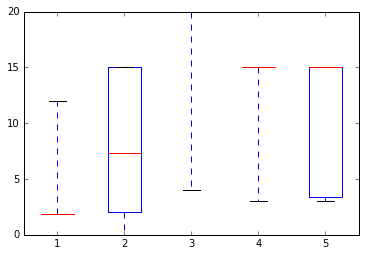

In [28]:


#plt.show()
plt.savefig(''.join(['value_sup_on','ahu_03']))

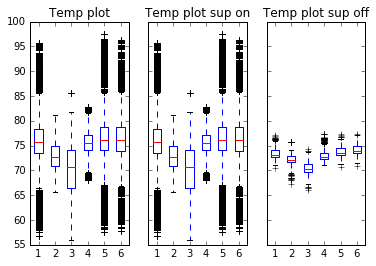

In [11]:
data1=[ahu03['Discharger temp'],ahu03['Mixed air temp'],ahu03['Pre-heat coil discharger temp'],
       ahu03['Return air temp'],ahu03['re-heat coil 1 Discharger temp'],ahu03['re-heat coil 2 Discharger temp']]
data_temp_sup = [sup_on['Discharger temp'],sup_on['Mixed air temp'],sup_on['Pre-heat coil discharger temp']
                ,sup_on['Return air temp'],sup_on['re-heat coil 1 Discharger temp'],sup_on['re-heat coil 2 Discharger temp']]
data_temp_sup_1 = [sup_off['Discharger temp'],sup_off['Mixed air temp'],sup_off['Pre-heat coil discharger temp']
                ,sup_off['Return air temp'],sup_off['re-heat coil 1 Discharger temp'],sup_off['re-heat coil 2 Discharger temp']]
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True)
ax1.boxplot(data1)
ax2.boxplot(data_temp_sup)
ax3.boxplot(data_temp_sup_1)
ax1.set_title('Temp plot')
ax2.set_title('Temp plot sup on')
ax3.set_title('Temp plot sup off')
#plt.show()
plt.savefig(''.join(['temperature','_ahu_03']))

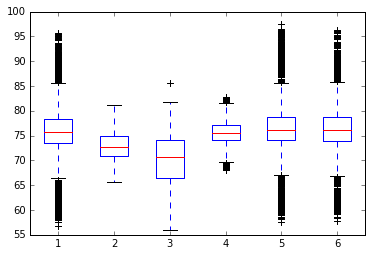

In [18]:
df1=ahu03.copy()
print ahu03.columns.values
df1 = df1.drop(['Date','Time','supply fan status','Minimum outside air damper %'],1)
print df1.columns.values

['Date' 'Time' 'supply fan status' 'Cooling coil valve %' 'Discharger temp'
 'Mixed air damper %' 'Mixed air temp' 'Minimum outside air damper %'
 'Pre-heat coil discharger temp' 'Pre-heat valve %' 'Return air temp'
 're-heat coil 1 Discharger temp' 're-heat coil 1 Discharger valve'
 're-heat coil 2 Discharger temp' 're-heat coil 2 Discharger valve']
['Cooling coil valve %' 'Discharger temp' 'Mixed air damper %'
 'Mixed air temp' 'Pre-heat coil discharger temp' 'Pre-heat valve %'
 'Return air temp' 're-heat coil 1 Discharger temp'
 're-heat coil 1 Discharger valve' 're-heat coil 2 Discharger temp'
 're-heat coil 2 Discharger valve']


In [ ]:
df = pd.scatter_matrix(df1,alpha=0.2,figsize=(25,25),diagonal='kde')
plt.savefig(''.join(['bivariate','_ahu_03']))